# PCAP calculation from EDD export

## Setup

Import dependencies: 

In [1]:
%matplotlib inline

import csv
import seaborn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

from sklearn.decomposition import PCA

## Load data

Here, we will import the CSV downloaded from EDD and process it into desired format.

First, let's define an auxiliary function:

In [2]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

Then, we load the data into a data frame:

In [3]:
df = pd.read_csv('PCAP using EDD.csv')
feature_relationships = {'ATOB_ECOLI':'AtoB',
                         'ERG8_YEAST':'PMK',
                         'IDI_ECOLI':'idi',
                         'KIME_YEAST':'MK',
                         'MVD1_YEAST':'PMD',
                         'Q40322_MENSP':'LS',
                         'Q8LKJ3_ABIGR':'GPPS',
                         'Q9FD86_STAAU':'HMGR',
                         'Q9FD87_STAAU':'HMGS'}


We now replace the EDD standard labels for proteins by more familiar names (i.e. the ones in Alonso-Gutierrez *et al*):

In [4]:
line_names        = df['Line Name'].unique() 
measurement_types = df['Measurement Type'].unique()
time_points       = [ candidate_point for candidate_point in df.columns.values if is_number(candidate_point)]
    
feature_names = ['AtoB','HMGS','HMGR','MK','PMK','PMD','idi','GPPS','LS']
target_names  = ['Limonene',]
    
    
df = df[['Line Name','Measurement Type'] + time_points]
df = pd.pivot_table(df,values=time_points,index=['Line Name'],columns='Measurement Type',aggfunc=np.sum)
    
df.rename(columns=feature_relationships,inplace=True)
display(df)

24.0                                                 \
Measurement Type     AtoB      PMK      idi       MK   Limonene      PMD   
Line Name                                                                  
2X-Hh             0.12800  0.49470  0.99700  0.16860   71.05431  0.83370   
2X-Hl             0.02190  0.34070  1.05160  0.22560    2.46049  1.05400   
2X-Hm             0.06270  0.18990  0.91340  0.10600   52.13119  0.61760   
2X-Lh             0.23350  0.74630  2.33380  0.31960   53.60310  1.74500   
2X-Ll             0.04570  0.46910  1.59950  0.27090    5.98466  1.93670   
2X-Lm             0.17200  0.62130  2.52260  0.30430   56.97134  1.62580   
2X-Mh             0.23840  0.94130  3.18130  0.40100   75.39261  2.19360   
2X-Ml             0.03750  0.38040  1.34830  0.25130    5.17895  1.28880   
2X-Mm             0.22310  0.79010  2.73540  0.37440  101.20540  1.95920   
A-Hh              1.10020  0.94340  1.56370  0.37530   19.50820  1.72360   
A-Hl              0.81460  0.72140  1.79290  0.34880   18.16286  1.81800   
A-Hm              0.94790  0.77480  1.61730  0.34970   19.72107  1.72590   
A-Lh              0.84500  0.43340  0.71430  0.09830    1.65513  0.42150   
A-Ll              1.07510  0.66070  2.04110  0.25540   15.23455  1.63900   
A-Lm              1.07960  0.70080  1.21310  0.19090    2.53969  0.61060   
A-Mh              1.51080  1.39050  1.38890  0.35360    7.98940  1.14070   
A-Ml              1.27920  0.76480  2.05450  0.29860   15.33663  1.84790   
A-Mm              1.48960  1.18100  1.74950  0.35170    9.66957  1.26380   
B-Hh              0.14690  0.24860  0.96500  0.15360   26.46285  0.70320   
B-Hl              0.04320  0.19390  0.73740  0.11270    5.11461  0.68120   
B-Hm              0.12650  0.23900  1.05950  0.12540   21.93264  0.68600   
B-Lh              0.40270  0.31940  1.16970  0.10400   10.68617  0.86850   
B-Ll              0.13180  0.38310  1.47700  0.20280   58.53777  0.97210   
B-Lm              0.35500  0.50610  1.06380  0.20060   12.75786  0.90100   
B-Mh              0.61590  0.98160  1.73010  0.32350   31.61376  1.79440   
B-Ml              0.16540  0.44070  1.85270  0.25550  104.53655  1.12900   
B-Mm              0.38230  0.69690  2.13160  0.37200   35.29984  1.59970   
BL-Mh             1.95983  0.78130  2.59550  1.42496  127.99494  4.10495   
BL-Ml             0.24012  0.19050  0.94884  0.38070    6.72018  1.30811   
BL-Mm             1.25540  0.58985  2.29065  1.04860  119.81367  3.19300   

                                                                       
Measurement Type Optical Density        LS     GPPS     HMGR     HMGS  
Line Name                                                              
2X-Hh                    4.18000   3.84850  0.37460  0.11930  0.21260  
2X-Hl                    5.86600   1.47510  0.06050  0.02800  0.04290  
2X-Hm                    4.40867   2.88990  0.18370  0.08940  0.17210  
2X-Lh                    4.96467   9.17280  0.25340  0.69980  0.66070  
2X-Ll                    6.36200   3.06770  0.14230  0.09980  0.12100  
2X-Lm                    4.87267   8.47490  0.22450  0.43050  0.49440  
2X-Mh                    4.19200  11.20370  0.29680  0.78160  0.74880  
2X-Ml                    5.93000   2.38310  0.08530  0.08150  0.08960  
2X-Mm                    4.31600   9.23380  0.43350  0.51180  0.54090  
A-Hh                     4.69667   3.45340  0.29480  1.65790  2.59270  
A-Hl                     5.03733   2.76620  0.15680  1.54670  2.08620  
A-Hm                     4.81667   3.11190  0.21730  1.69630  2.41780  
A-Lh                     5.77800   4.26060  2.32960  2.15910  3.35890  
A-Ll                     4.90733   3.66700  0.14870  3.35860  4.36050  
A-Lm                     6.11200   5.09240  2.70610  3.59700  3.96710  
A-Mh                     5.29333   7.03330  4.52670  3.32620  4.47210  
A-Ml                     4.88600   4.03260  0.47690  3.71690  4.09220  
A-Mm                     4.95867   6.78340  3.70420  3.97700  5.13260  


And, finally, we convert the data into a feature matrix and and objective column for use with scikit-learn:

In [5]:
feature_indices = [(time_points[0],feature_name) for feature_name in feature_names]
target_indices  = [(time_points[0],target_name)  for target_name  in target_names]

X = df.as_matrix(columns=feature_indices).tolist()
y = df.as_matrix(columns=target_indices).transpose().tolist()[0]

## Plot PCA

First do PCA and transform points for initial experiments first and then transform points for the second experiment using initial transformation:

In [6]:
limonene_pca = PCA(n_components=2)
transformed_points = limonene_pca.fit_transform(X[0:27])
new_transformed_points = limonene_pca.transform(X[27:])

We then invert the x axis so it looks like the original figure instead of a specular image of it:

In [7]:
transformed_x = [-1*point[0] for point in transformed_points]
transformed_y = [point[1] for point in transformed_points]

new_transformed_x = [-1*point[0] for point in new_transformed_points]
new_transformed_y = [point[1] for point in new_transformed_points]

Plot first and second components (first experiment in blue, second experiment in red):

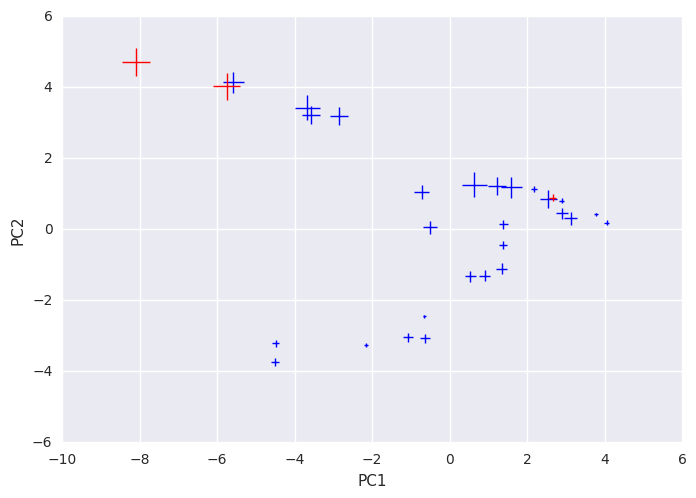

In [8]:
y_scaled = [item/max(y)*400 for item in y]
plt.scatter(transformed_x,transformed_y,marker='+',s=y_scaled[0:27],linewidths=1)
plt.scatter(new_transformed_x,new_transformed_y,color='red',marker='+',s=y_scaled[27:],linewidths=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

which is Fig. 4 in Alonso-Gutierrez *et al*.

## References

Alonso-Gutierrez, Jorge, et al. "Principal component analysis of proteomics (PCAP) as a tool to direct metabolic engineering." Metabolic engineering 28 (2015): 123-133.